In [194]:
import numpy as np 
import pandas as pd 

import seaborn as sns 
import matplotlib.pyplot as plt

In [ ]:
import os
import pandas as pd

# Specify the directory containing the CSV files
directory = r'C:\Users\james\OneDrive\Documents\GitHub\jamsydLibrary\approved_projects\cot_correlation\Data'

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        # Construct the full file path
        filepath = os.path.join(directory, filename)
        # Read the CSV file
        df = pd.read_csv(filepath)
        # Print the DataFrame or perform other operations
        print(f"Data from {filename}:")
        print(df)
        print("\n")


: 

### Reading in Data

In [ ]:
df = pd.read_csv(r'C:\Users\james\OneDrive\Documents\GitHub\jamsydLibrary\approved_projects\cot_correlation\Data\Weekly\CBOT_DL_ZC1!, 1W.csv',parse_dates=True,index_col='time')

In [ ]:
df = df.dropna(axis=0)

In [ ]:
df = df.tail(1000)

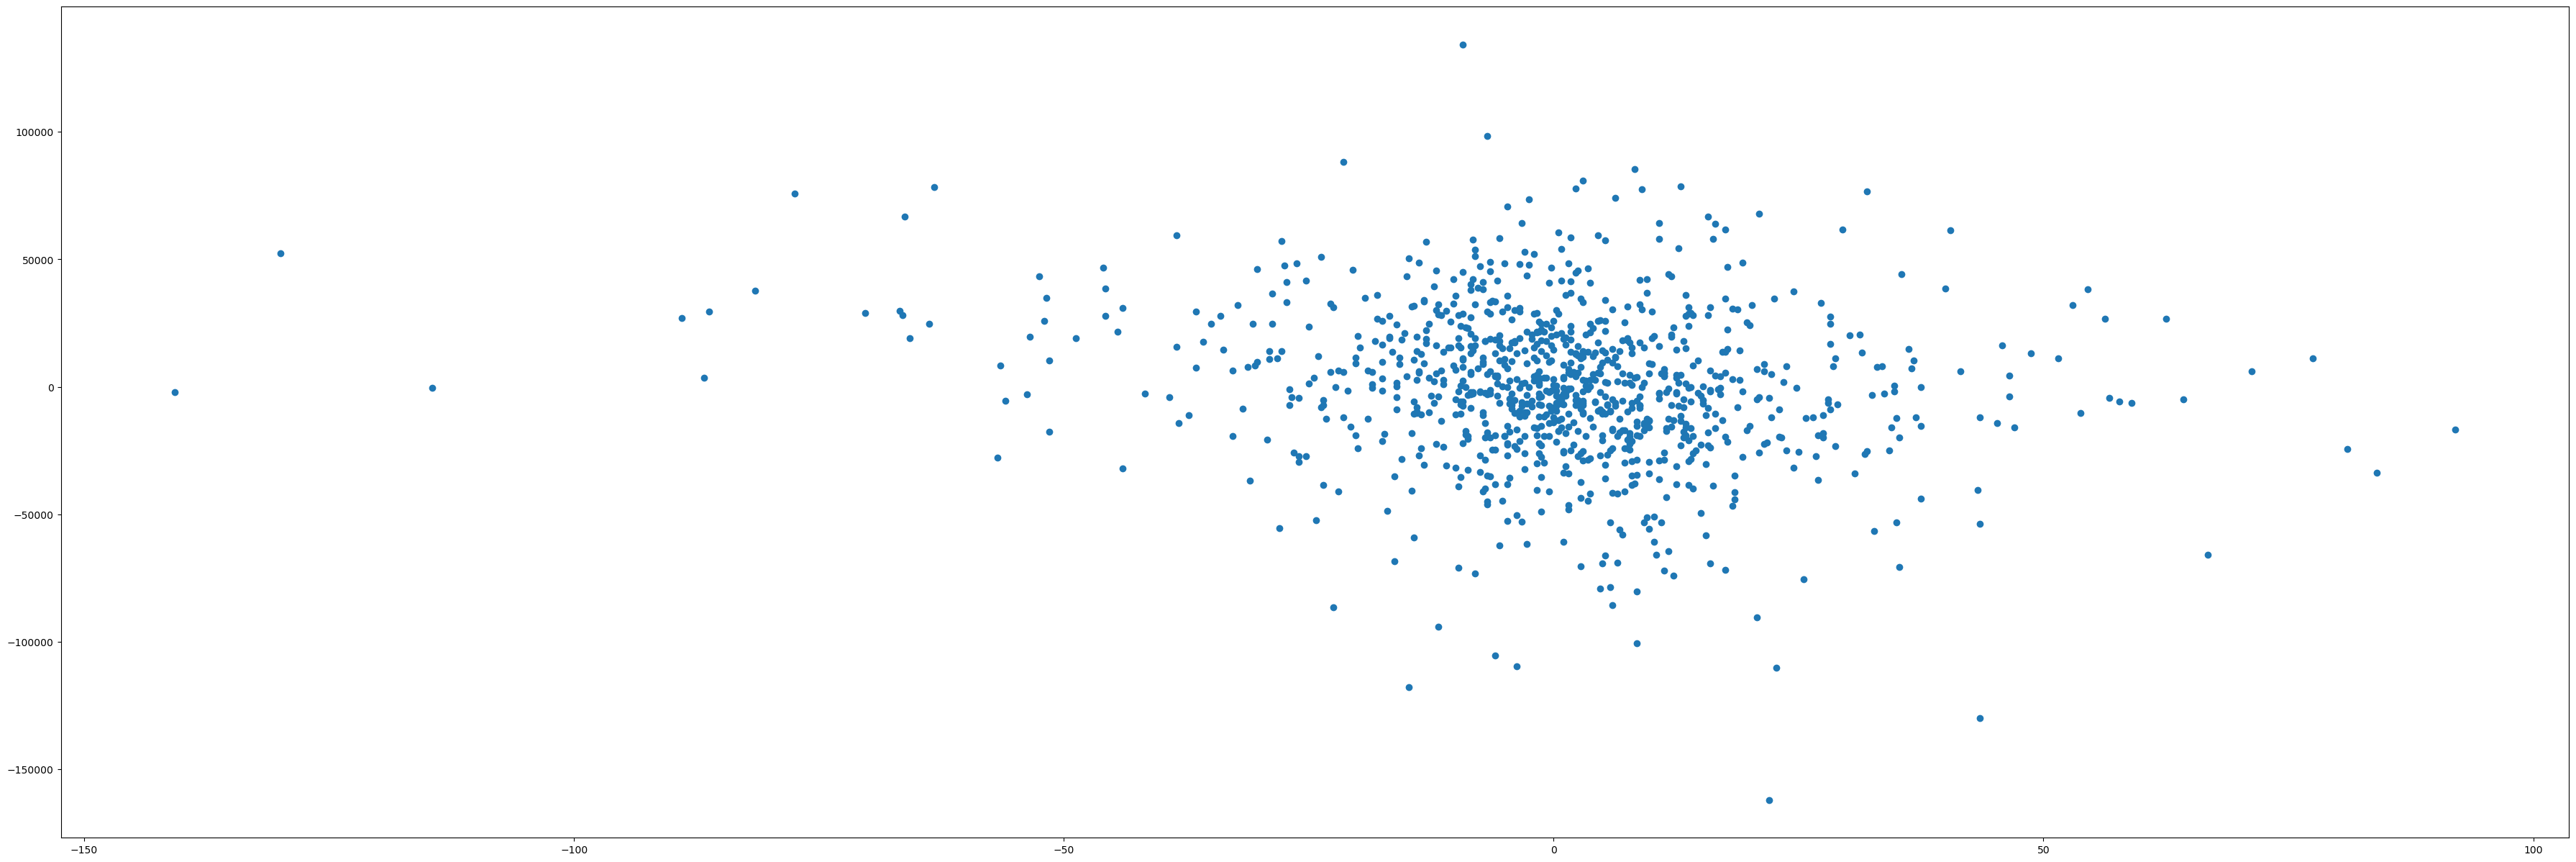

In [ ]:
plt.figure(figsize=(45,15))
plt.scatter(df['close'].diff(1),df['Commercials net'].diff(1))
plt.show()

# Correlation Analysis

In [ ]:
df_diff = df.diff(1)

In [ ]:
import pandas as pd

# Assuming df_diff is already loaded and date-indexed properly
# Create flags based on conditions
df_diff['commercials_net_flag'] = np.where(df_diff['Commercials net'] > 0, 1, 0)
df_diff['close_flag'] = np.where(df_diff['high'] > 0, 1, 0)

# Create a combined flag that is 1 only if both conditions are true
df_diff['combined_flag'] = np.where((df_diff['commercials_net_flag'] == 1) & (df_diff['close_flag'] == 1), 1, 0)

df_diff['commercials_net_flag'] = df_diff['commercials_net_flag'].shift(1)

# Drop rows with any NaN values
df_diff = df_diff.dropna(axis=0)

# Calculate the ratio of sum of 'combined_flag' to the length of the DataFrame for each month across all years
monthly_ratio = df_diff.groupby(df_diff.index.month)['combined_flag'].agg(['sum', 'count'])

# Compute the ratio of 'sum' to 'count'
monthly_ratio['ratio'] = monthly_ratio['sum'] / monthly_ratio['count']

# Display the result
print(monthly_ratio['ratio'])


time
1     0.341176
2     0.259740
3     0.360465
4     0.406977
5     0.369048
6     0.301205
7     0.273810
8     0.352941
9     0.400000
10    0.290698
11    0.259259
12    0.313253
Name: ratio, dtype: float64


In [ ]:
df_diff['commercials_net_flag'] = np.where(df_diff['Commercials net'] > 0, 1, 0)
df_diff['close_flag']           = np.where(df_diff['high'] > 0, 1, 0)

df_diff = df_diff.dropna(axis=0)


In [ ]:
df_diff['combined_flag'] = np.where((df_diff['commercials_net_flag'] == 1) & (df_diff['close_flag'] == 1), 1, 0)


In [ ]:
df_diff

,open,high,low,close,Commercials net,commercials_net_flag,close_flag,combined_flag
time,,,,,,,,
2005-03-21,-3.25,-10.25,-10.25,-9.25,7801.0,1,0,0
2005-03-28,-8.75,-5.00,-0.25,2.25,13176.0,1,0,0
2005-04-04,2.00,-1.50,-5.25,-8.75,23050.0,1,0,0
2005-04-11,-8.00,-4.75,0.00,2.25,12836.0,1,0,0
2005-04-18,2.25,3.25,0.25,3.00,-6265.0,0,1,0
...,...,...,...,...,...,...,...,...
2024-04-08,-8.00,-4.50,2.50,1.00,3242.0,1,0,0
2024-04-15,0.75,-2.50,-0.75,-1.25,18288.0,1,0,0
2024-04-22,-2.25,9.50,4.75,6.50,-41782.0,0,1,0


In [ ]:
df_diff['combined_flag'].sum()/len(df_diff)

0.14914914914914915

### Flag Correlation

In [ ]:
# Assuming df_diff['commercials_net_flag'] and df_diff['close_flag'] are already defined
correlation = df_diff['commercials_net_flag'].corr(df_diff['close_flag'])
print(f"The correlation between 'commercials_net_flag' and 'close_flag' is: {correlation}")


The correlation between 'commercials_net_flag' and 'close_flag' is: -0.43129723673261444


### Autoregression

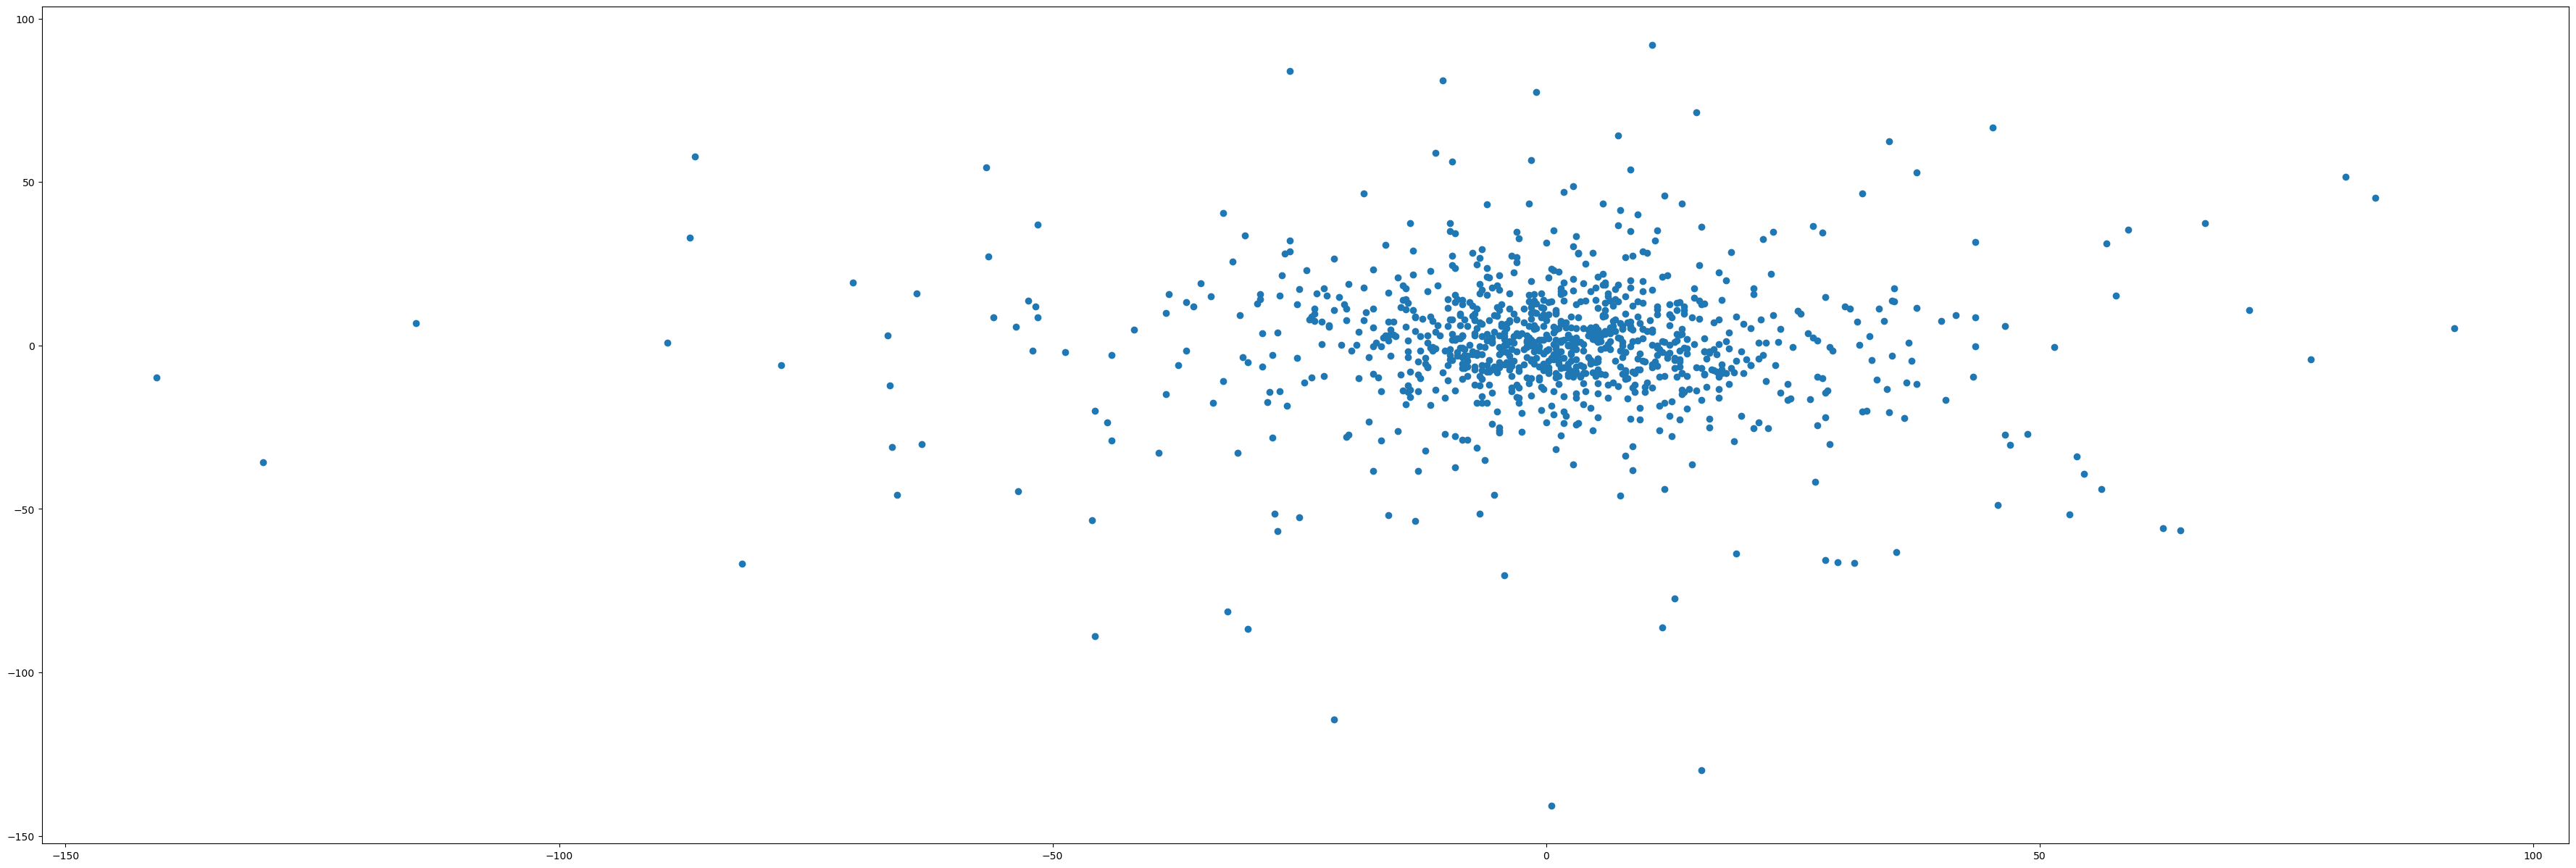

In [ ]:
plt.figure(figsize=(45,15))
plt.scatter(df_diff['close'],df_diff['close'].shift(1))
plt.show()

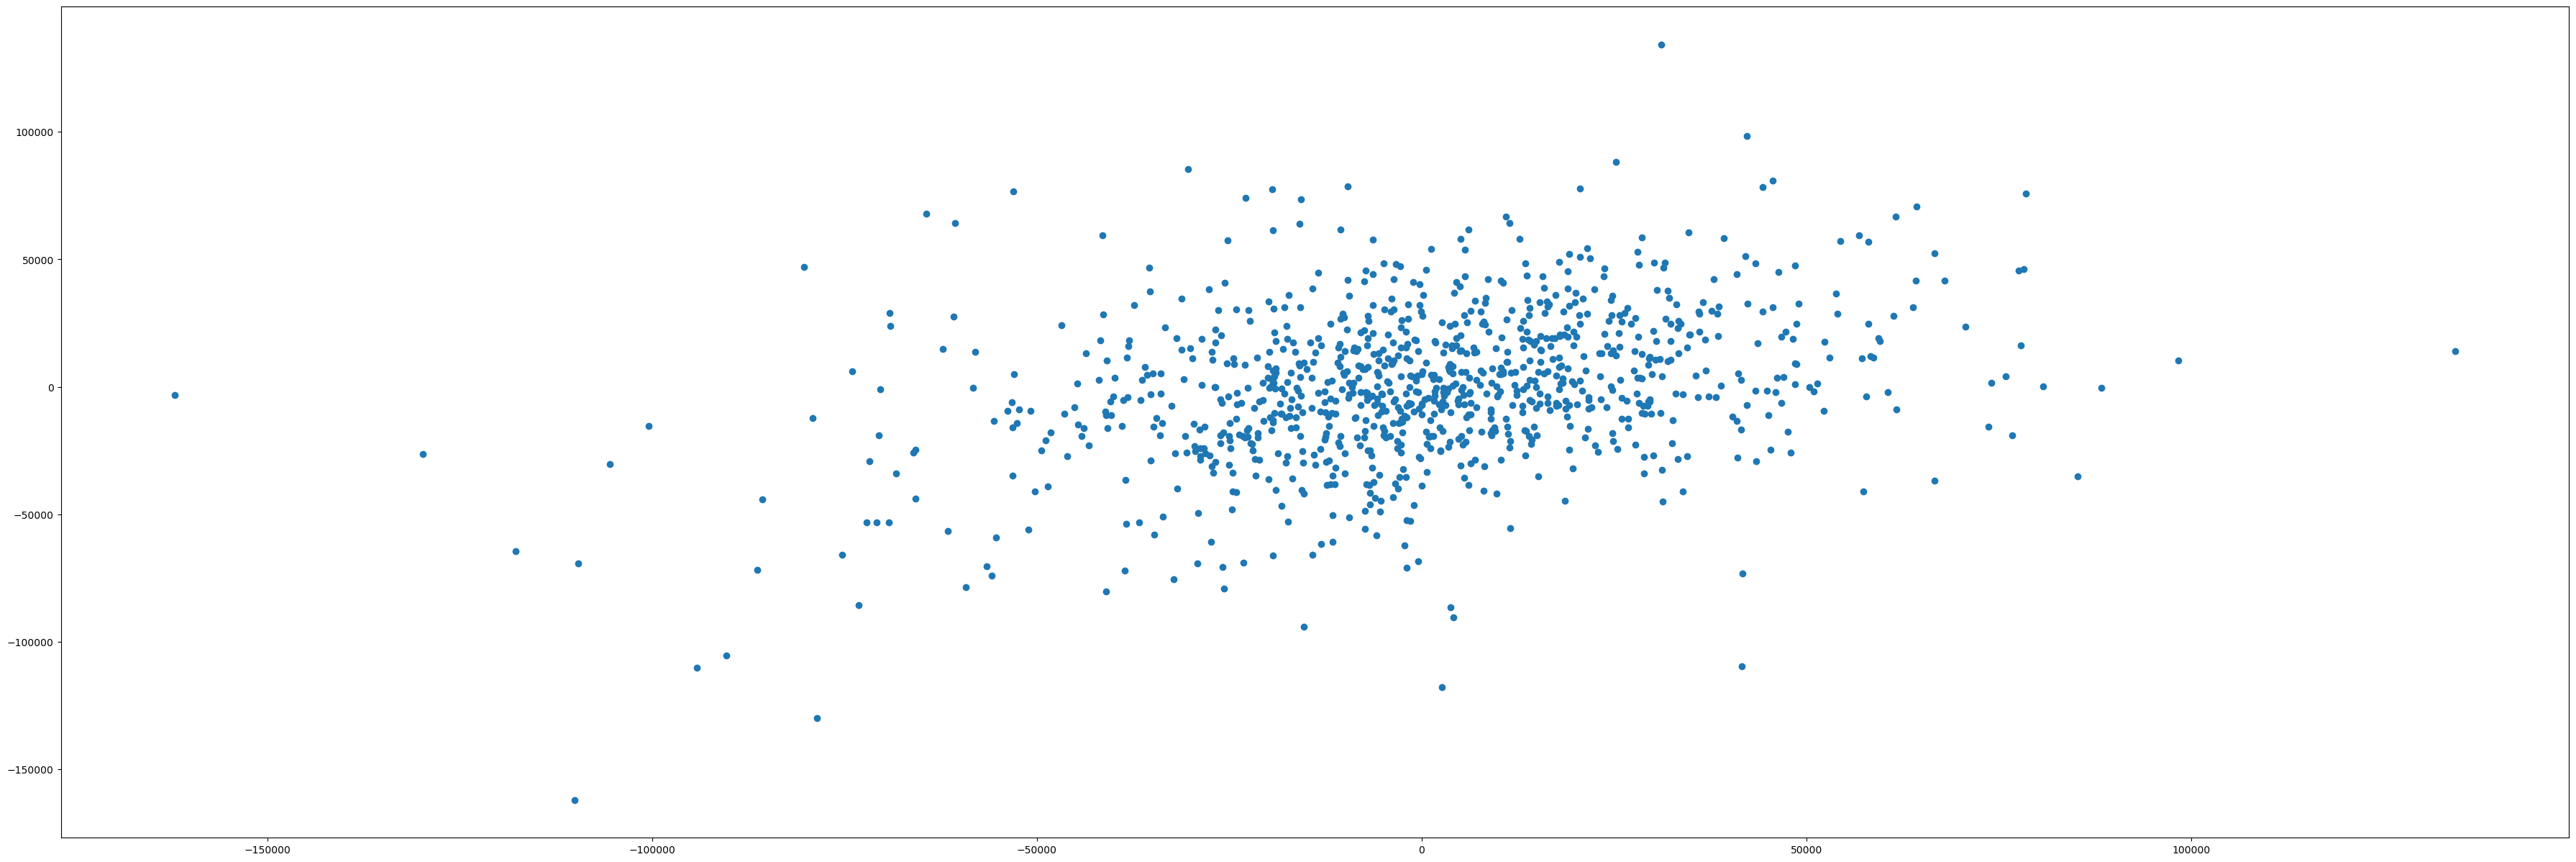

In [ ]:
plt.figure(figsize=(45,15))
plt.scatter(df_diff['Commercials net'],df_diff['Commercials net'].shift(1))
plt.show()

### Commercials Net vs. Price

In [ ]:
df_diff = df.dropna(axis=0)

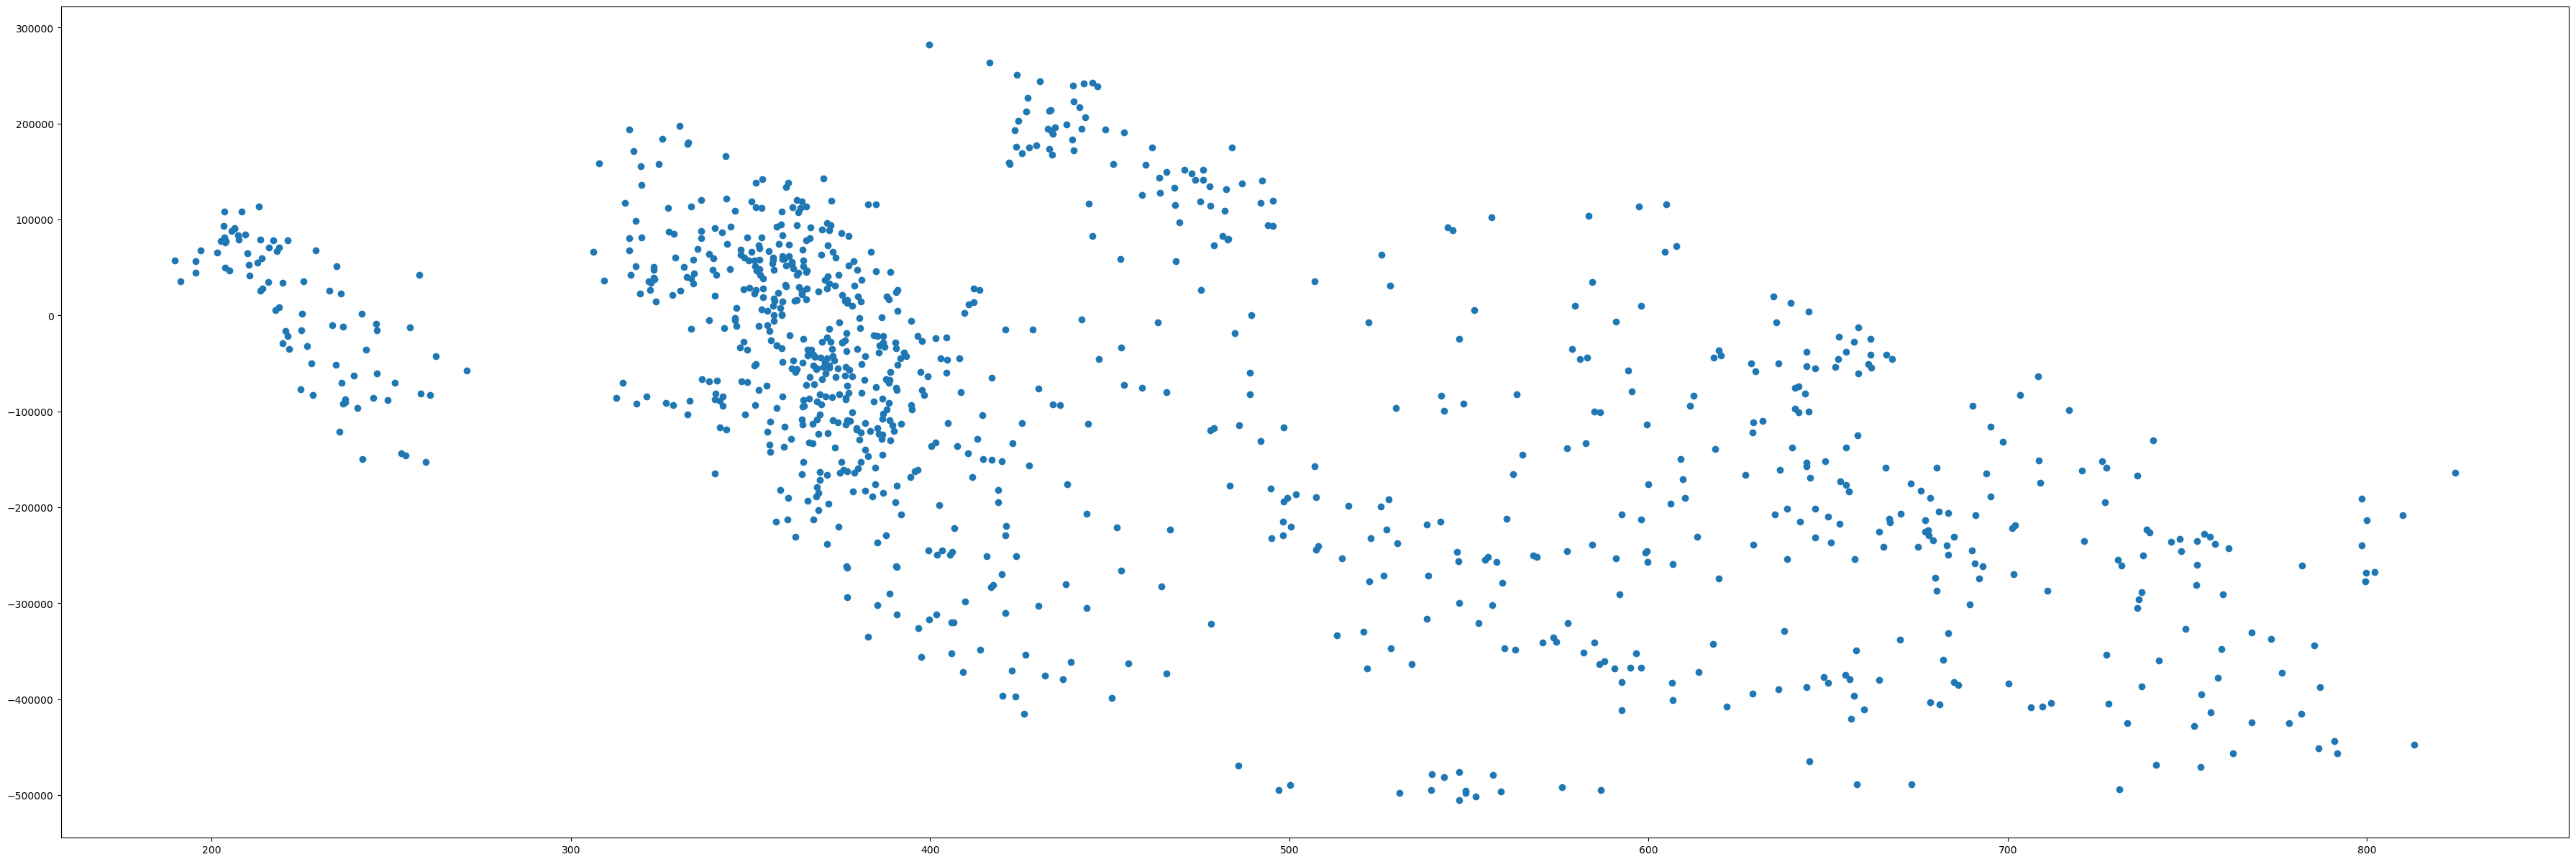

In [ ]:
plt.figure(figsize=(45,15))
plt.scatter(df['close'],df['Commercials net'])
plt.show()
